# For each year of data, a timeline of avalanche activity. Bar chart? Could each slide path be a different color and you stack them? Goal would be to see what times of year avalanches happen and which paths slide when.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [2]:
avyobs= pd.read_pickle('/Users/ashleyshell/Documents/GitHub.nosync/avalanche-alley/data-prep/pkl/avy_obs.pkl')

In [3]:
pd.set_option('display.max_columns', None)
avyobs

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
505,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,NU,R1,D1.5,O,T,U,0,1830,SW,1460,370,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
506,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,N,R2,D2,O,T,C,40,2075,SE,1646,429,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN


In [4]:
PATH1163 = avyobs.loc[avyobs.avpathid == 'PATH1163']
PATH1163

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
12,PATH1163,2012-02-22,12:40:00,stein_01,SS,5.0,N,R2,D2,O,T,L,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Crown on Looker's Left Top of Main Path- Below...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
14,PATH1163,2012-02-22,08:15:00,stein_01,U,5.0,N,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,U,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,"Fresh avalanche debris located 2/3 path at 4,6...",ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
30,PATH1163,2011-12-29,13:00:00,dunda_01,SS,5.0,N,R1,D2,U,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Slab in main gully. Crown 100' vertical from r...,NaN,2016-03-17 11:50:56,ed,NaN,0000-00-00 00:00:00,NaN
42,PATH1163,2011-01-16,09:00:00,stein_01,U,5.0,NU,R2,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Ran 2/3rds path,Steiner,2016-03-17 11:50:56,01,NaN,0000-00-00 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,PATH1163,2022-02-10,14:49:00,clark_01,WL,5.0,NU,R1,D2,O,M,L,0,0,SW,1400,0,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,Initiated in a gully looker's right about half...,Adam,2022-02-11 16:51:42,170.49.113.19,Adam,2022-02-17 18:45:51,170.49.113.19
491,PATH1163,2022-02-20,09:45:00,clark_01,L,5.0,NU,R1,D1.5,S,T,L,0,2165,SE,1465,700,0,0,0,0,TK,-,U,D,False,0.0,0.0,False,0.0,0.0,Small dry loose from all the way at the top of...,Adam,2022-02-20 13:16:16,170.49.113.17,NaN,0000-00-00 00:00:00,NaN
494,PATH1163,2022-03-01,07:35:00,clark_01,U,5.0,NU,U,D2.5,I,T,U,0,0,S,1400,0,0,0,0,0,MR,-,U,W,False,0.0,0.0,False,0.0,0.0,"Path obscured by fog, no other details known. ...",Adam,2022-03-01 13:32:54,170.49.113.17,Adam,2022-03-15 13:34:54,10.30.72.4


In [5]:
avyobs['month'] = pd.DatetimeIndex(avyobs['edcr_time']).month

In [6]:
PATH1163['month'] = pd.DatetimeIndex(PATH1163['edcr_time']).month

/var/folders/_g/dr204lbj3s1c6m88fsk34kch0000gn/T/ipykernel_1346/3870944105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PATH1163['month'] = pd.DatetimeIndex(PATH1163['edcr_time']).month


In [7]:
PATH1163

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
12,PATH1163,2012-02-22,12:40:00,stein_01,SS,5.0,N,R2,D2,O,T,L,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Crown on Looker's Left Top of Main Path- Below...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
14,PATH1163,2012-02-22,08:15:00,stein_01,U,5.0,N,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,U,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,"Fresh avalanche debris located 2/3 path at 4,6...",ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
30,PATH1163,2011-12-29,13:00:00,dunda_01,SS,5.0,N,R1,D2,U,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Slab in main gully. Crown 100' vertical from r...,NaN,2016-03-17 11:50:56,ed,NaN,0000-00-00 00:00:00,NaN,3
42,PATH1163,2011-01-16,09:00:00,stein_01,U,5.0,NU,R2,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Ran 2/3rds path,Steiner,2016-03-17 11:50:56,01,NaN,0000-00-00 00:00:00,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,PATH1163,2022-02-10,14:49:00,clark_01,WL,5.0,NU,R1,D2,O,M,L,0,0,SW,1400,0,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,Initiated in a gully looker's right about half...,Adam,2022-02-11 16:51:42,170.49.113.19,Adam,2022-02-17 18:45:51,170.49.113.19,2
491,PATH1163,2022-02-20,09:45:00,clark_01,L,5.0,NU,R1,D1.5,S,T,L,0,2165,SE,1465,700,0,0,0,0,TK,-,U,D,False,0.0,0.0,False,0.0,0.0,Small dry loose from all the way at the top of...,Adam,2022-02-20 13:16:16,170.49.113.17,NaN,0000-00-00 00:00:00,NaN,2
494,PATH1163,2022-03-01,07:35:00,clark_01,U,5.0,NU,U,D2.5,I,T,U,0,0,S,1400,0,0,0,0,0,MR,-,U,W,False,0.0,0.0,False,0.0,0.0,"Path obscured by fog, no other details known. ...",Adam,2022-03-01 13:32:54,170.49.113.17,Adam,2022-03-15 13:34:54,10.30.72.4,3


<AxesSubplot:xlabel='month', ylabel='avrid'>

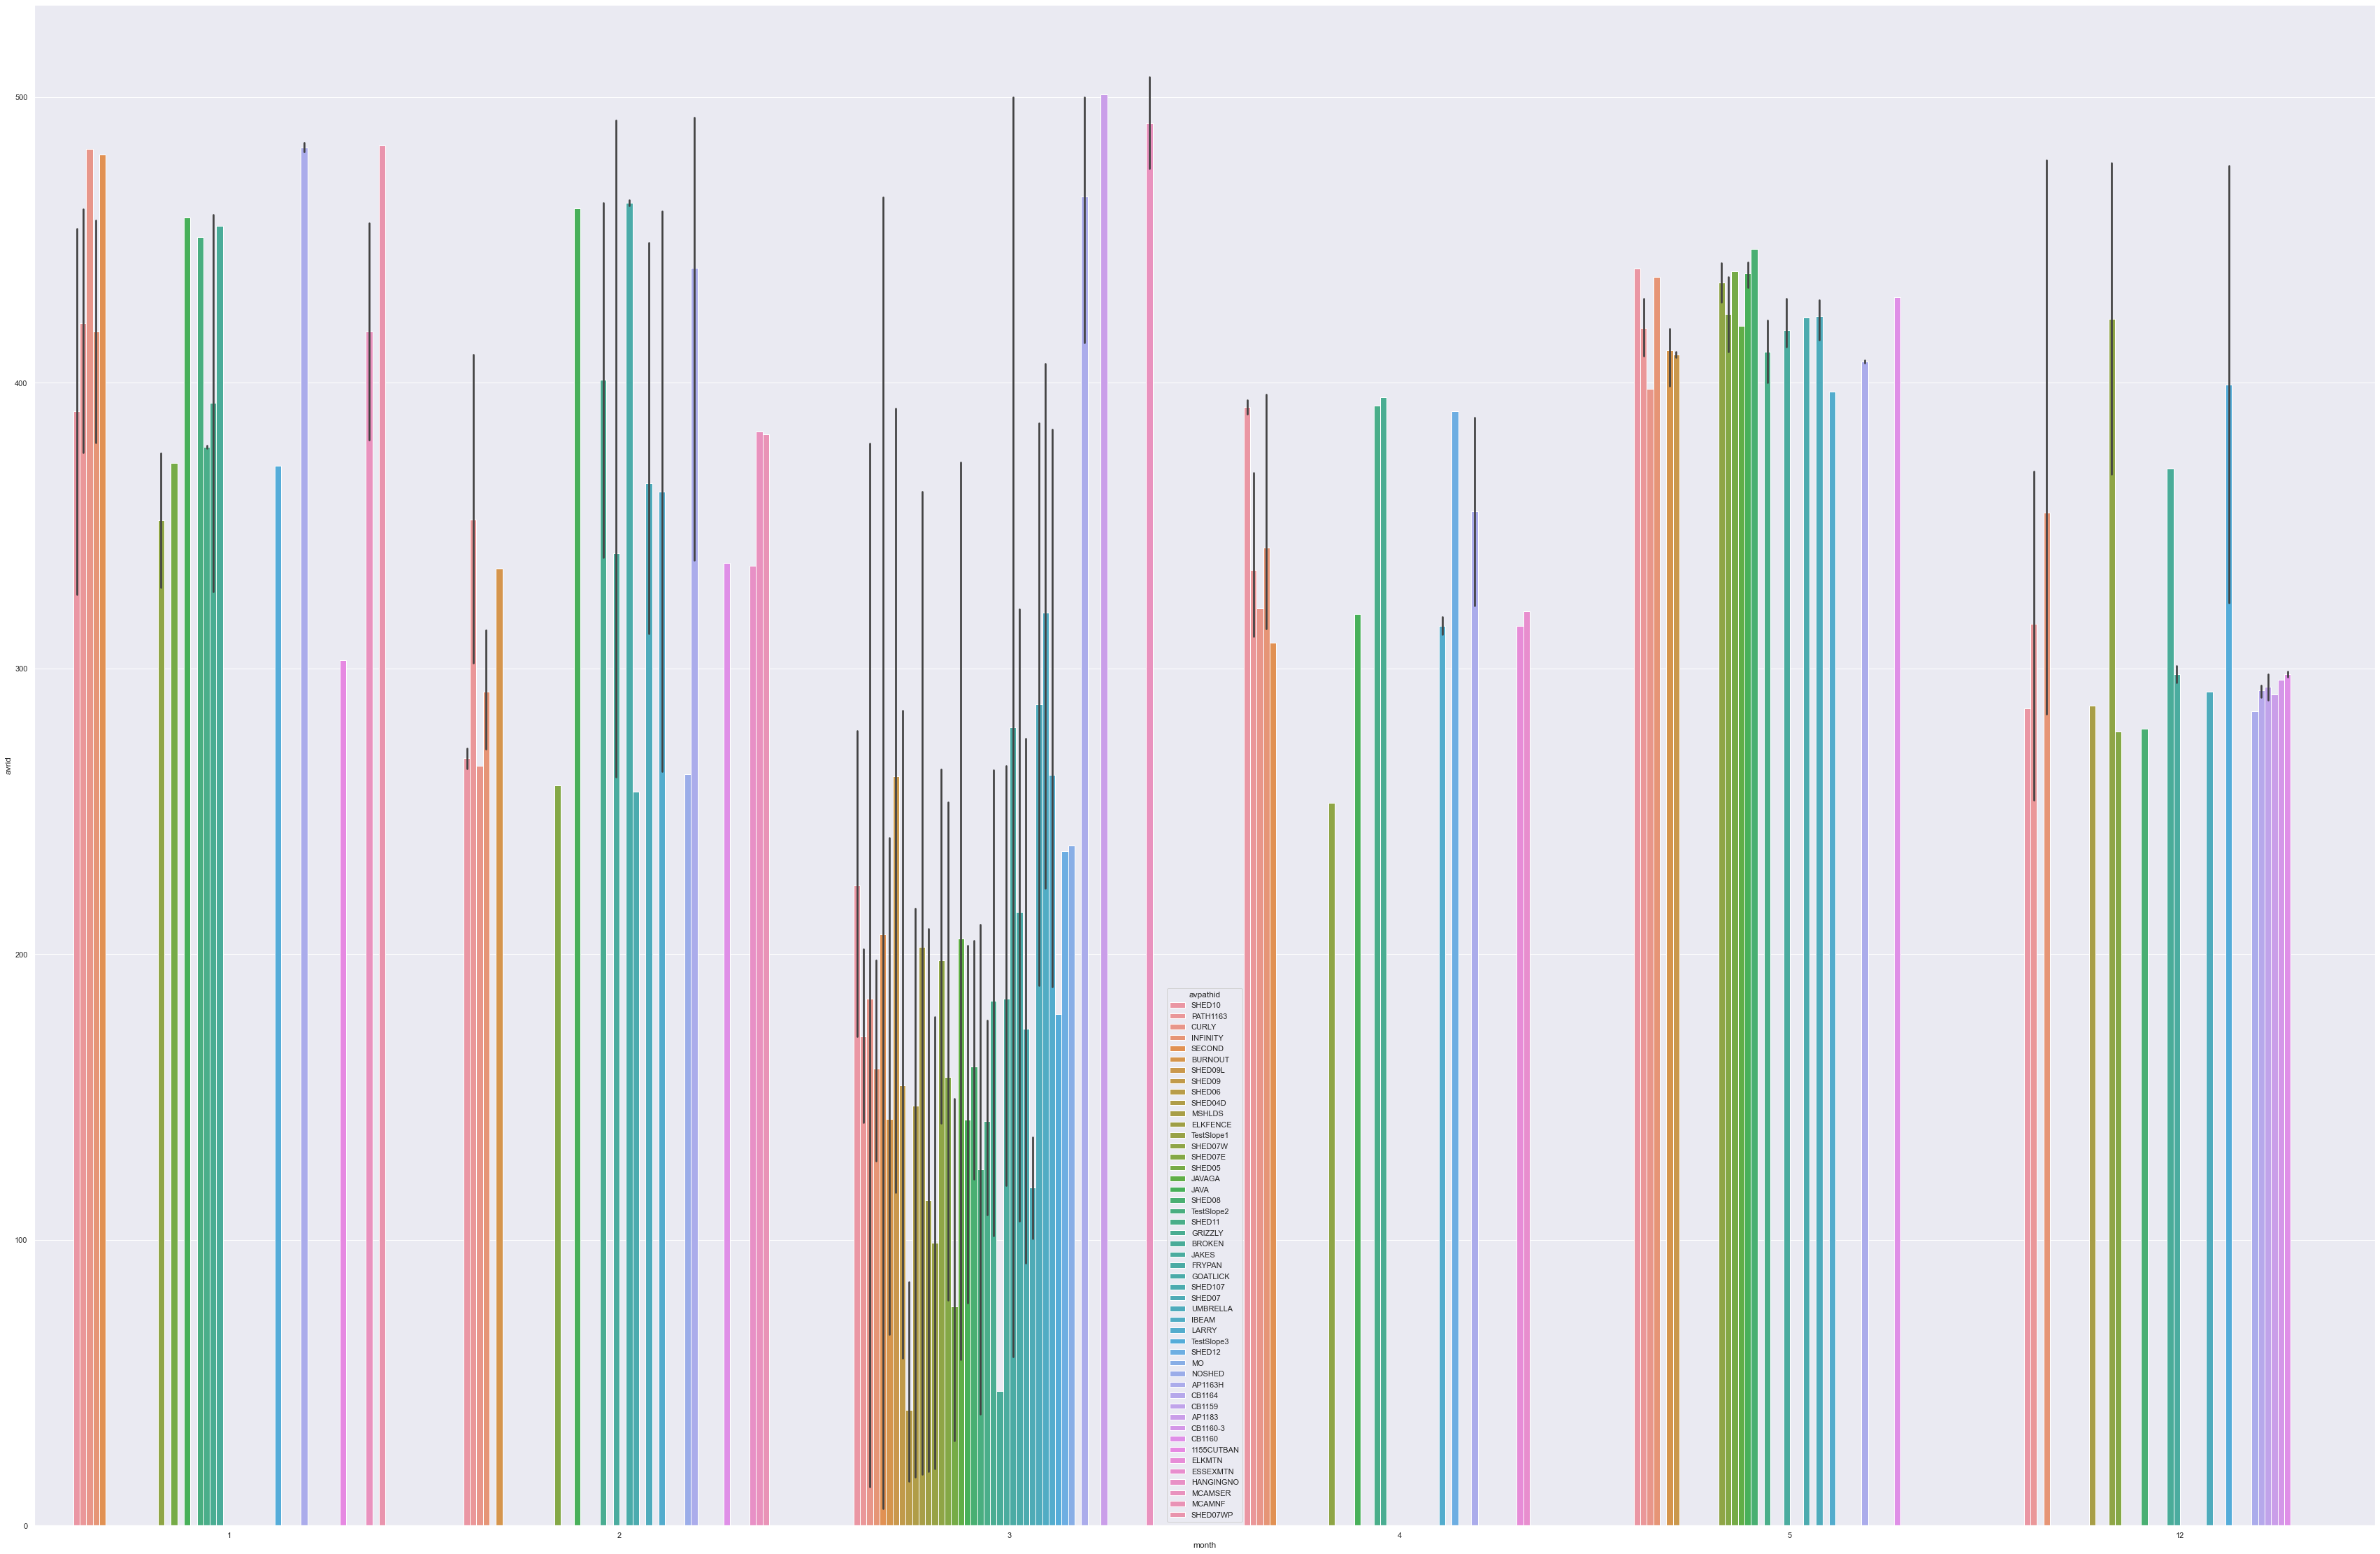

In [8]:
sns.set(rc={'figure.figsize':(60,40)})
sns.barplot(data=avyobs, x="month", y=avyobs.index, hue = 'avpathid')


In [9]:
paths = avyobs.avpathid.value_counts().to_frame()
paths

,avpathid
PATH1163,105
INFINITY,58
SHED10,35
SHED07W,28
SHED11,23
JAKES,20
SHED07E,17
SHED08,16
JAVA,15
AP1163H,14


In [10]:
month = avyobs.month.value_counts().to_frame()
month

,month
3,308
5,49
2,49
1,32
12,28
4,25


<AxesSubplot:xlabel='avpathid'>

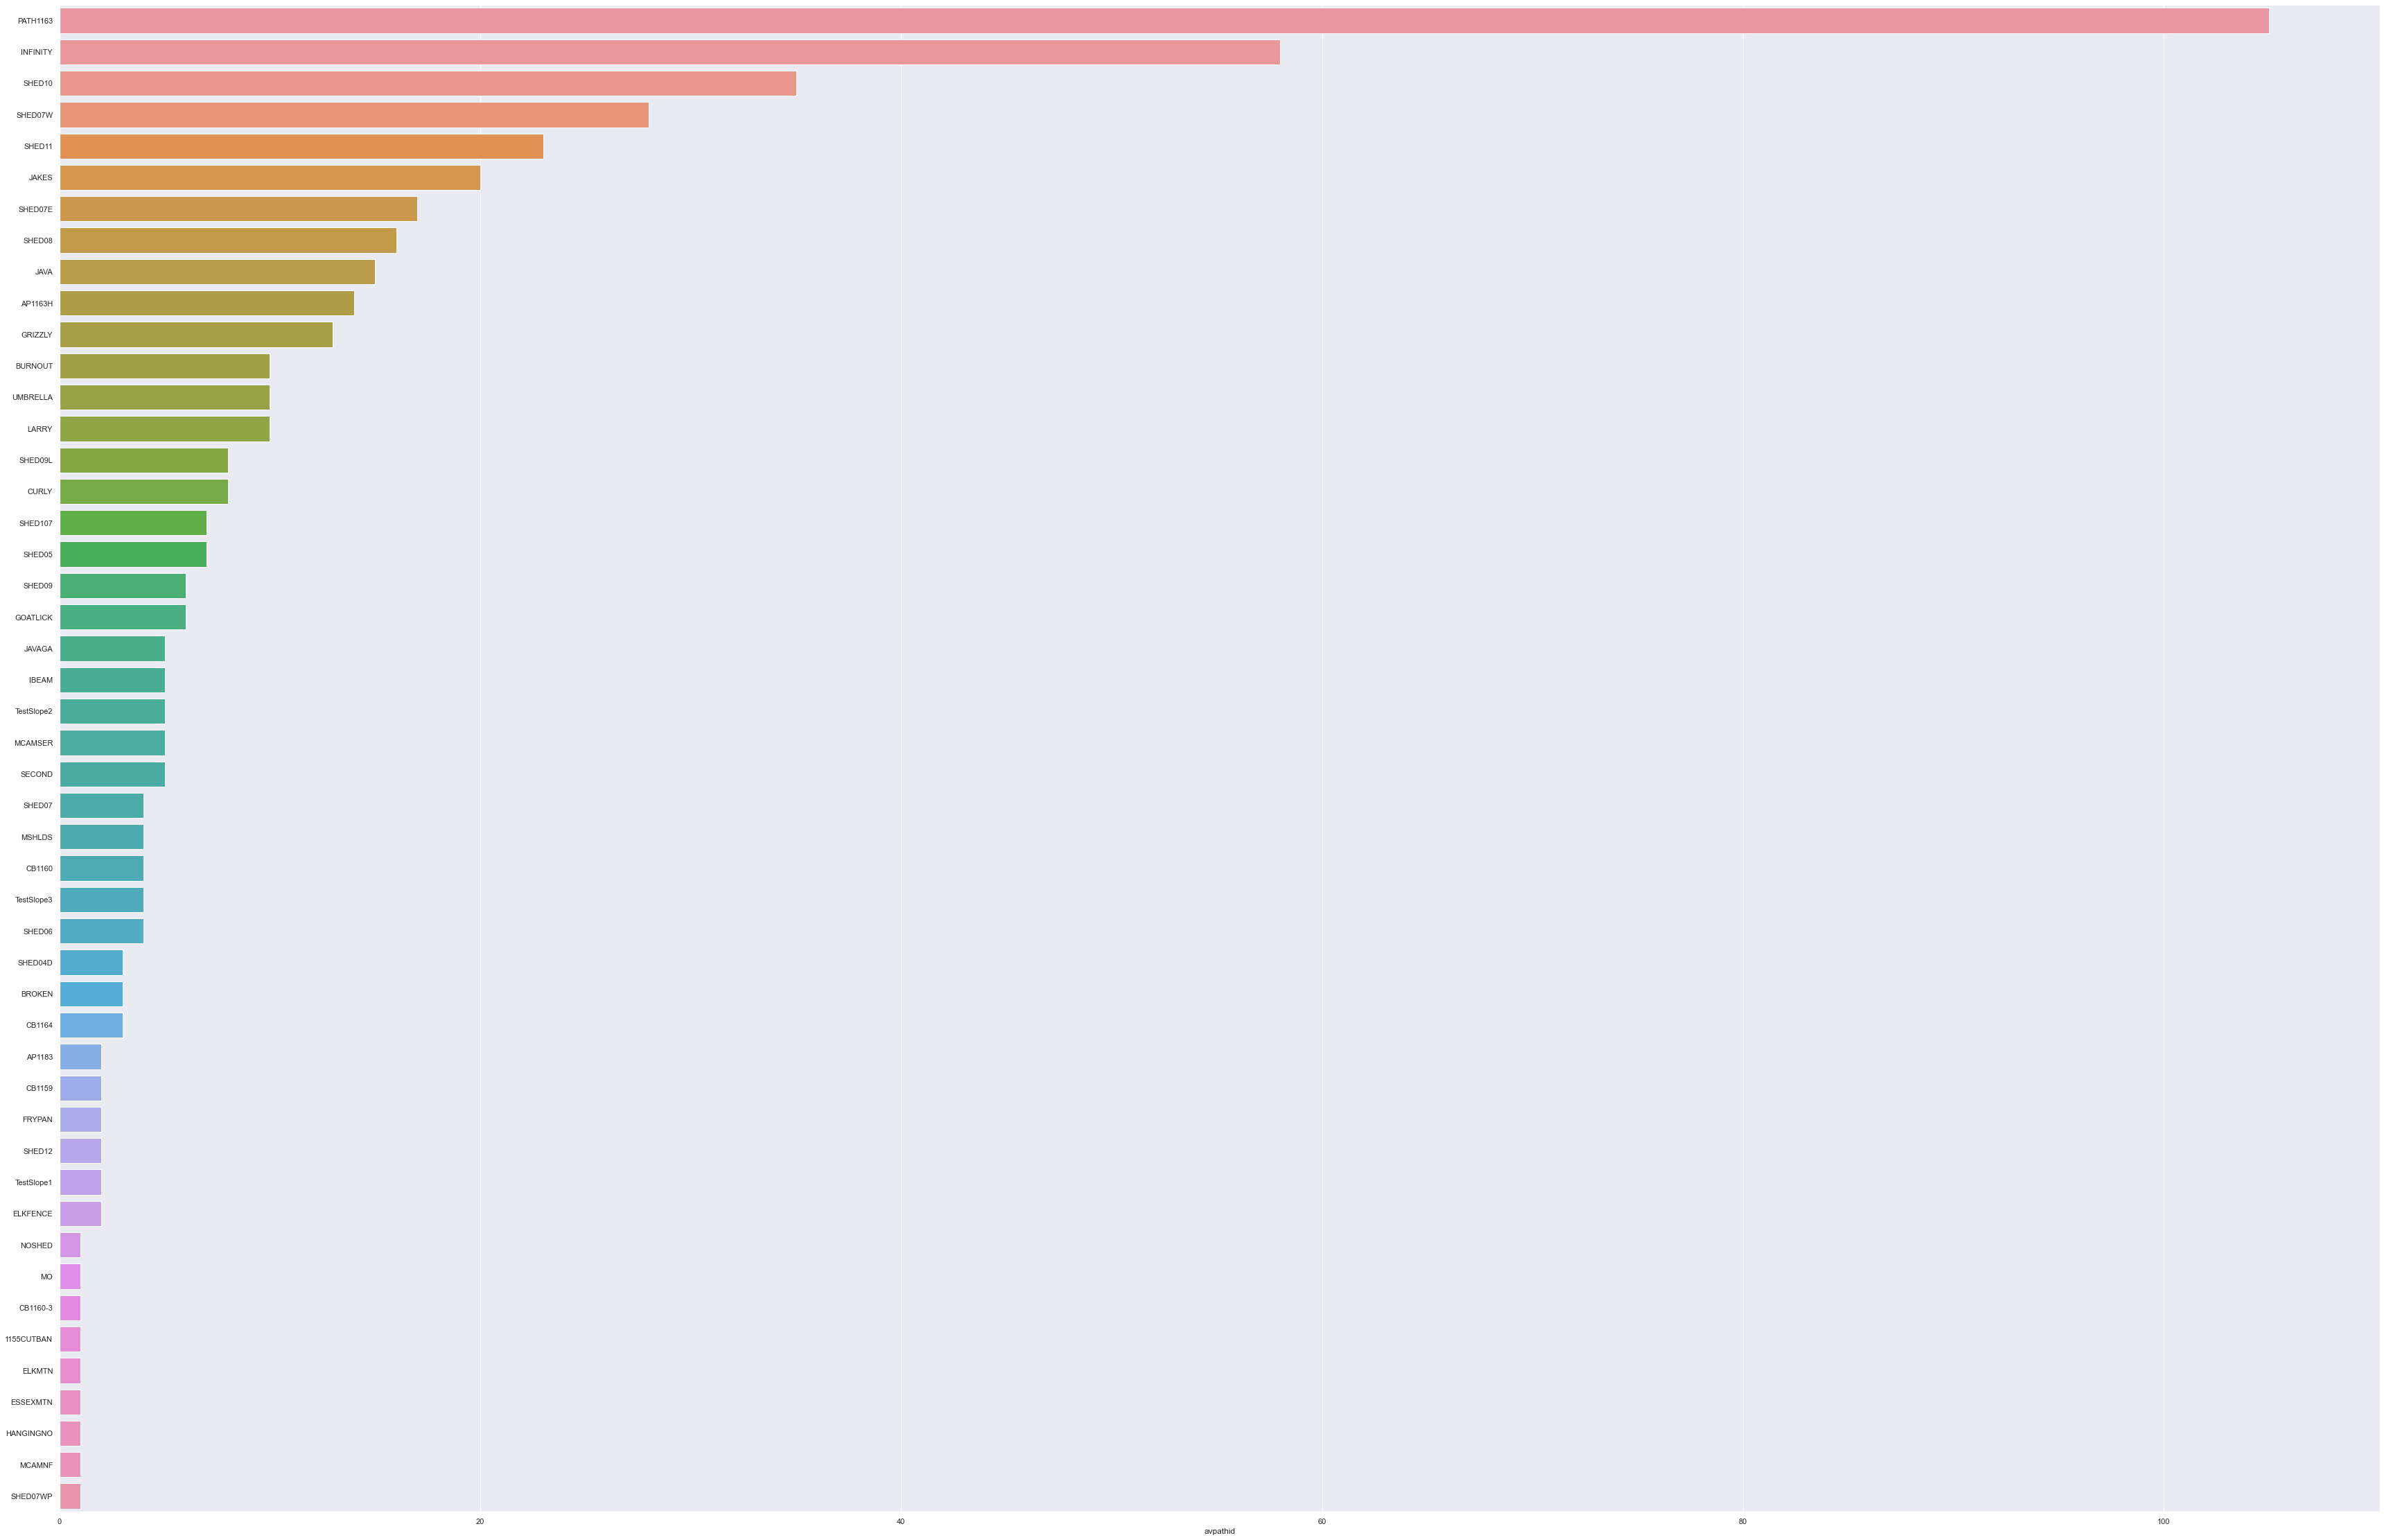

In [11]:
sns.set(rc={'figure.figsize':(60,40)})
sns.barplot(data=paths, x='avpathid', y=paths.index)


In [12]:
top = avyobs.loc[(avyobs.avpathid == 'PATH1163') | (avyobs.avpathid == 'INFINITY')| (avyobs.avpathid == 'SHED10') |(avyobs.avpathid == 'SHED07W') |(avyobs.avpathid == 'SHED11')]
top


,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
9,INFINITY,2012-02-28,11:09:00,dunda_01,SS,5.0,N,R2,D1,I,T,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Fracture line - 6400',ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,INFINITY,2022-03-02,11:35:00,clark_01,WL,5.0,N,R2,D1.5,I,T,C,40,1800,S,1400,400,0,0,0,0,TR,-,U,U,False,0.0,0.0,False,0.0,0.0,One of the last avalanches observed during the...,Adam,2022-03-15 13:38:53,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,3
503,PATH1163,2022-03-17,19:02:00,clark_01,WL,5.0,NU,R1,D1.5,S,M,L,40,1830,SE,1550,280,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-03-17 21:04:31,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,3
504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,3


In [13]:
#df = pd.DataFrame({'avpathid': ['PATH1163', 'INFINITY', 'SHED10', 'SHED07W', 'SHED11'],
                 #  'avalanches': [105, 58, 35, 28, 23],
                #  'march': []})
#df

<AxesSubplot:xlabel='month', ylabel='avrid'>

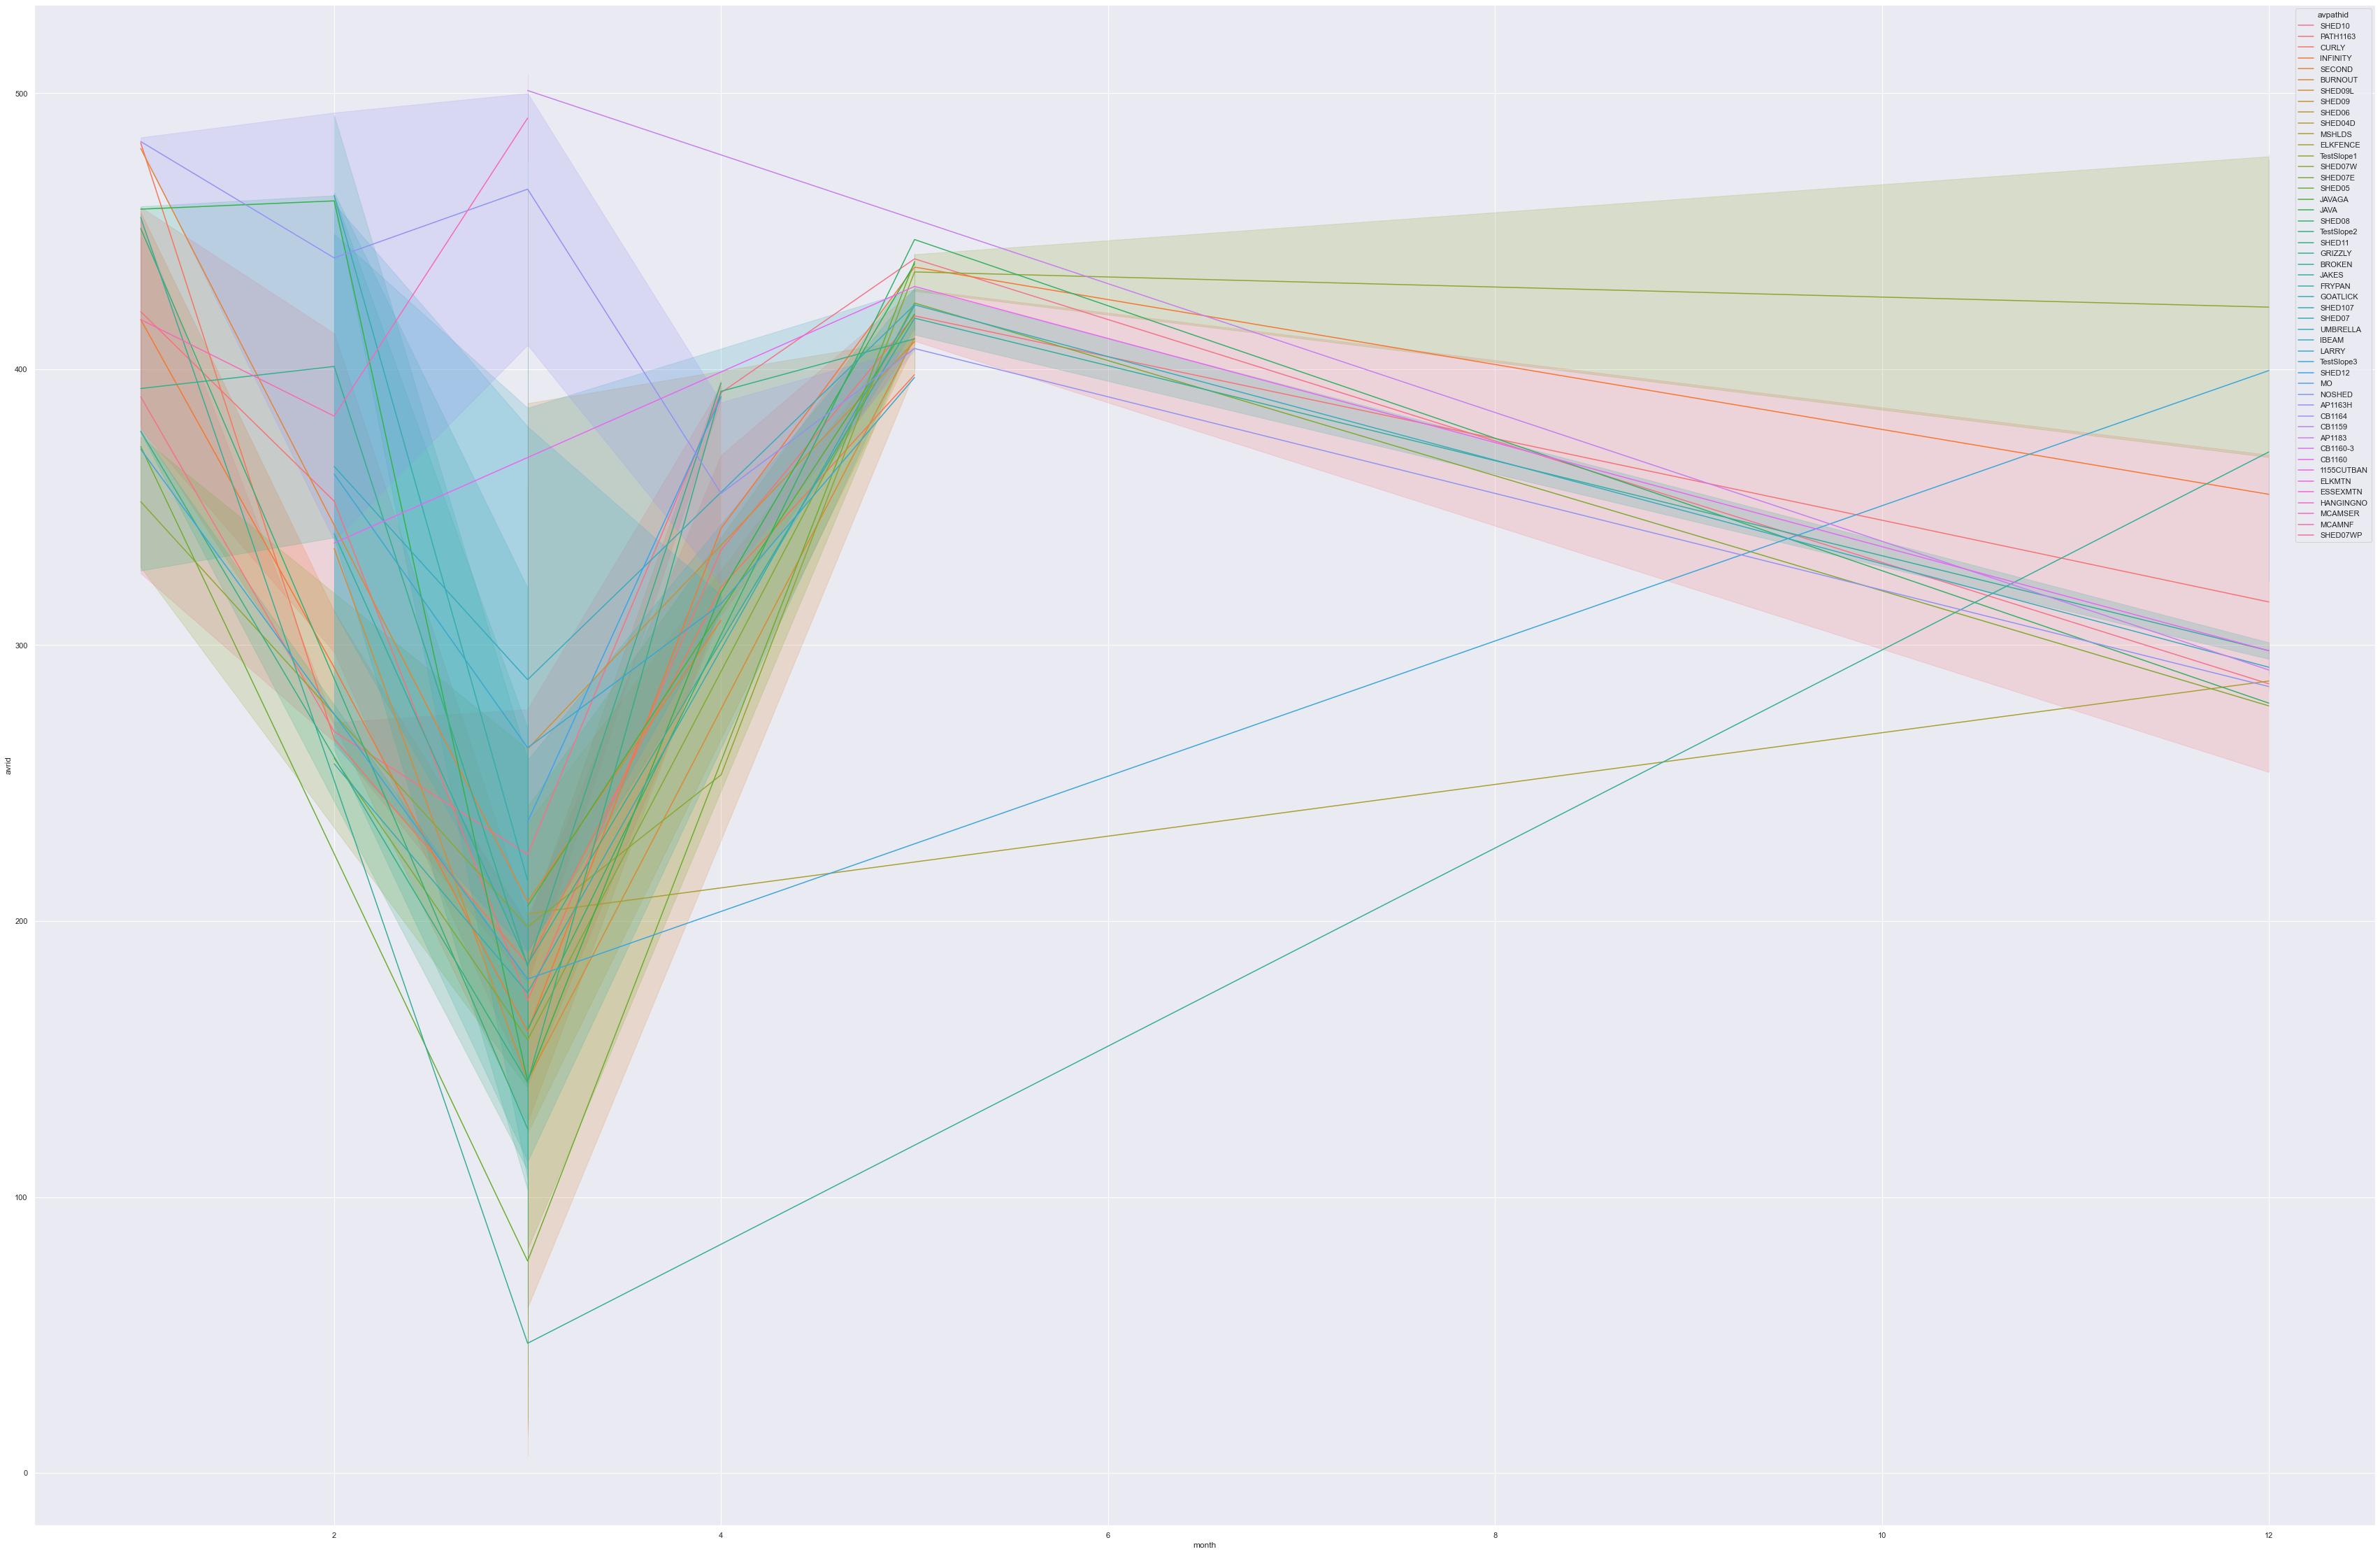

In [14]:

sns.lineplot(data=avyobs, x="month", y=avyobs.index, hue="avpathid")

In [15]:
avyobs

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,3
505,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,NU,R1,D1.5,O,T,U,0,1830,SW,1460,370,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,3
506,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,N,R2,D2,O,T,C,40,2075,SE,1646,429,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,3


#### https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas

In [16]:
avyobs['year'] = pd.DatetimeIndex(avyobs['edcr_time']).year

In [17]:
avyobs

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month,year
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,3,2022
505,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,NU,R1,D1.5,O,T,U,0,1830,SW,1460,370,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,3,2022
506,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,N,R2,D2,O,T,C,40,2075,SE,1646,429,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,3,2022


<AxesSubplot:xlabel='year', ylabel='avrid'>

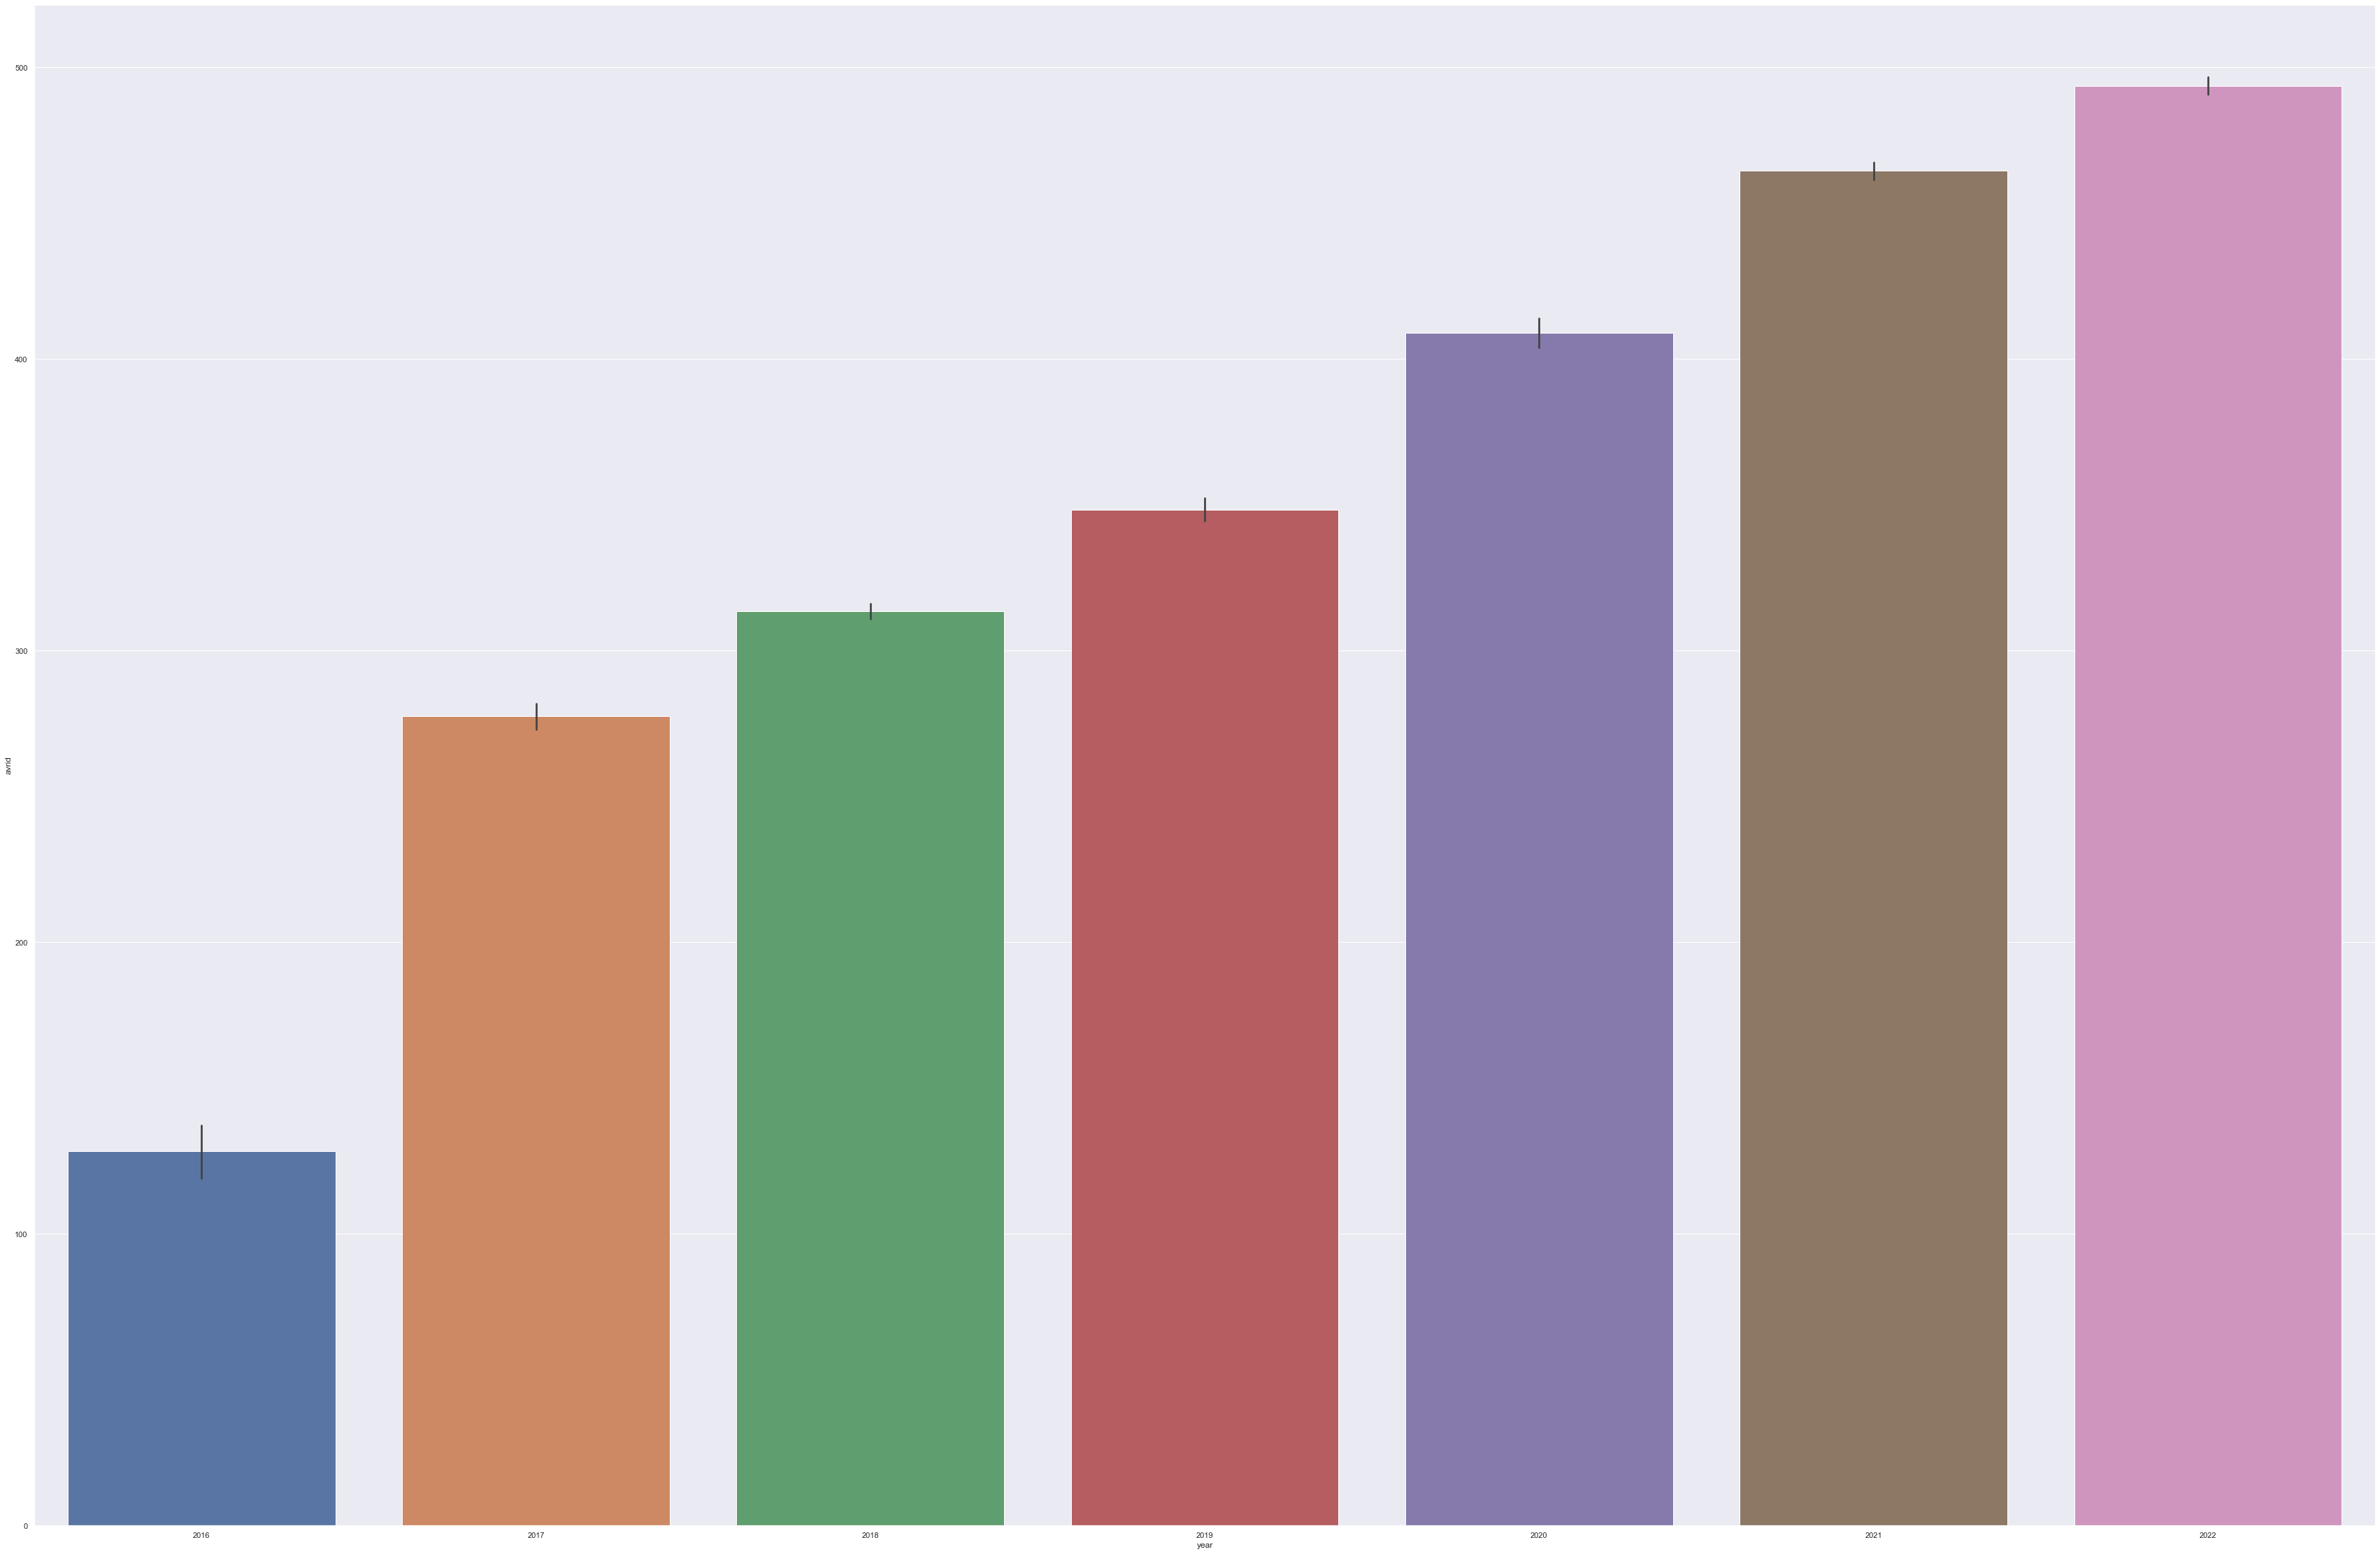

In [27]:
sns.set(rc={'figure.figsize':(60,40)})
sns.barplot(data=avyobs, x="year", y=avyobs.index)

In [20]:
year2016 = avyobs.loc[avyobs.year == 2016]
year2016

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month,year
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,SHED07W,2015-12-21,11:00:00,stein_01,SS,5.0,NC,R1,D2,I,T,L,35,2060,NaN,1850,210,40,90,20,55,TK,NaN,NaN,U,False,0.0,0.0,False,0.0,0.0,Likely ran early morning on 12/21/2015,Ted,2016-03-17 11:50:56,10.173.132.17,NaN,0000-00-00 00:00:00,NaN,3,2016
251,SHED08,2015-12-23,11:30:00,stein_01,SS,5.0,NU,R2,D1.5,I,T,C,37,1909,NaN,0,0,30,30,30,30,U,NaN,NaN,D,False,0.0,0.0,False,0.0,0.0,Unknown terminus elevation,Ted,2016-03-17 11:50:56,10.173.132.17,NaN,0000-00-00 00:00:00,NaN,3,2016
252,TestSlope2,2016-01-14,13:30:00,clark_01,SS,2.0,AS,R2,D1.5,I,T,R,38,1707,NaN,1667,40,30,130,30,80,NaN,BP,NaN,D,False,0.0,0.0,False,0.0,0.0,NaN,Ted,2016-03-17 11:50:56,10.173.132.17,NaN,0000-00-00 00:00:00,NaN,3,2016


In [21]:
year2017 = avyobs.loc[avyobs.year == 2017]
year2017

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month,year
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255,PATH1163,2017-01-11,16:00:00,stein_01,SS,5.0,NU,R2,D2,U,T,R,0,2156,NaN,1557,599,50,90,60,75,TK,-,U,D,False,0.0,0.0,False,0.0,0.0,NaN,Ted,2017-02-27 13:38:54,139.51.15.22,NaN,0000-00-00 00:00:00,NaN,2,2017
256,PATH1163,2017-01-18,09:12:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,1557,0,0,0,0,0,TK,-,U,M,False,0.0,0.0,False,0.0,0.0,NaN,Ted,2017-02-27 13:41:23,139.51.15.22,NaN,0000-00-00 00:00:00,NaN,2,2017
257,SHED107,2017-02-06,10:00:00,clark_01,SS,5.0,NU,R2,D3,U,U,U,0,1796,N,1257,539,0,0,0,0,MR,-,U,U,True,20.0,0.2,False,0.0,0.0,Terminated on Shed 10.7 roof,Ted,2017-02-27 13:45:27,139.51.15.22,Ted,2020-06-29 10:16:11,64.91.61.64,2,2017
258,INFINITY,2017-02-06,10:07:00,clark_01,SS,5.0,NU,U,D2,U,U,U,0,0,NaN,1437,0,0,0,0,0,TR,-,U,D,False,0.0,0.0,False,0.0,0.0,Terminated 3/4 path to the rail grade.,Ted,2017-02-27 14:11:36,139.51.15.19,Ted,2017-02-27 14:25:00,139.51.15.20,2,2017
259,SHED07E,2017-02-06,10:15:00,clark_01,SS,5.0,NU,R3,D3,U,T,C,40,1882,N,1294,588,70,90,90,90,TR,-,U,D,True,30.0,1.5,False,0.0,0.0,Terminated in runout below Shed 7. Climbing l...,Ted,2017-02-27 14:18:50,139.51.15.22,Ted,2020-06-29 10:14:50,64.91.61.64,2,2017
260,PATH1163,2017-02-09,08:30:00,stein_01,SS,5.0,N,R3,D3,I,M,L,40,2028,SE,1236,792,45,120,90,105,BR,-,U,D,True,100.0,1.5,True,20.0,0.1,Natural SS avalanche in Path 1163 triggered na...,Ted,2017-02-27 15:25:55,139.51.15.20,Ted,2020-06-29 13:13:18,64.91.61.64,2,2017
261,INFINITY,2017-02-17,13:26:00,stein_01,L,5.0,N,U,D2,U,U,U,0,0,NaN,1353,0,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Ted,2017-02-27 15:32:05,139.51.15.20,NaN,0000-00-00 00:00:00,NaN,2,2017
262,JAKES,2017-01-18,12:35:00,stein_01,L,5.0,N,R3,D2,G,T,C,40,1588,N,1265,323,0,0,0,0,U,BP,U,W,True,10.0,0.8,False,0.0,0.0,"Wet, loose avalanche. Covered Main 1- Inside ...",Ted,2017-02-27 15:45:37,139.51.15.19,Ted,2020-06-29 10:28:52,64.91.61.64,2,2017
263,NOSHED,2017-02-07,12:30:00,stein_01,SS,1.0,AX,R4,D2,G,T,C,38,1353,N,1235,118,30,90,60,75,U,BP,3F,D,True,30.0,1.0,True,10.0,0.2,Triggered with Daisy Bell. Avalanche terminate...,Ted,2017-02-27 15:54:02,139.51.15.22,Ted,2020-06-29 09:58:06,64.91.61.64,2,2017


In [22]:
year2018 = avyobs.loc[avyobs.year == 2018]
year2018

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month,year
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
303,1155CUTBAN,2017-02-06,18:12:00,stein_01,SS,5.0,N,U,U,U,U,U,0,0,N,0,0,0,0,0,0,U,BP,U,D,True,0.0,0.0,False,0.0,0.0,Dark hours avalanche. Debris deposited on both...,Ted,2018-01-03 20:15:34,139.51.15.19,Ted,2020-06-29 10:13:01,64.91.61.64,1,2018
304,PATH1163,2018-02-08,08:30:00,stein_01,U,5.0,NU,R2,D2,U,U,U,0,0,NaN,1515,0,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Ted,2018-02-08 17:09:52,139.51.15.20,NaN,0000-00-00 00:00:00,NaN,2,2018
305,UMBRELLA,2018-02-07,14:00:00,stein_01,WS,5.0,NU,R2,D1,S,M,C,0,1380,N,1347,33,20,20,10,15,U,BP,U,M,True,5.0,1.0,False,0.0,0.0,Did not cause slide fence damage or delay any ...,Ted,2018-02-08 17:34:01,139.51.15.20,Ted,2020-06-29 12:55:59,64.91.61.64,2,2018
306,INFINITY,2018-02-08,08:40:00,stein_01,U,5.0,NU,U,D1.5,U,U,U,0,0,NaN,1648,0,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Ted,2018-02-09 08:09:37,139.51.15.19,Ted,2018-02-09 08:12:53,139.51.15.19,2,2018
307,INFINITY,2018-02-08,13:00:00,clark_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,4550,0,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Terminated 3/4 distance to the rail grade,Ted,2018-02-09 08:12:18,139.51.15.19,NaN,0000-00-00 00:00:00,NaN,2,2018
308,PATH1163,2018-02-19,13:40:00,stein_01,SS,5.0,NU,R2,D2,I,T,R,0,2121,NaN,1394,727,40,45,45,45,TK,-,U,D,False,0.0,0.0,False,0.0,0.0,Debris terminated approximately 2/3rds path.,Ted,2018-04-08 15:07:42,139.51.15.19,Ted,2018-04-08 15:10:32,139.51.15.19,4,2018
309,SECOND,2018-02-19,13:40:00,stein_01,SS,5.0,NU,R2,D1.5,I,M,R,0,1818,NaN,1394,424,0,0,0,0,TK,-,U,D,False,0.0,0.0,False,0.0,0.0,NaN,Ted,2018-04-08 15:18:07,139.51.15.19,NaN,0000-00-00 00:00:00,NaN,4,2018
310,PATH1163,2018-03-12,15:07:00,stein_01,L,5.0,N,R2,D2,U,M,L,0,0,NaN,0,0,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Ted,2018-04-08 15:20:29,139.51.15.19,NaN,0000-00-00 00:00:00,NaN,4,2018
311,PATH1163,2018-04-08,12:12:00,stein_01,U,5.0,N,R2,D1.5,U,U,U,0,0,NaN,1758,0,0,0,0,0,TK,-,U,M,False,0.0,0.0,False,0.0,0.0,NaN,Ted,2018-04-08 15:23:22,139.51.15.19,NaN,0000-00-00 00:00:00,NaN,4,2018


In [23]:
year2019 = avyobs.loc[avyobs.year == 2019]
year2019

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month,year
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
326,SHED10,2019-01-03,11:00:00,clark_01,HS,5.0,N,R2,D2,O,T,L,0,2070,NaN,1585,485,50,200,50,125,TR,-,U,U,False,0.0,0.0,False,0.0,0.0,Shed 10 Feeder. Probably ran earlier this morn...,Adam,2019-01-03 17:07:12,139.51.15.22,Adam,2019-02-11 22:22:27,139.51.15.19,1,2019
327,GRIZZLY,2019-01-06,13:10:00,clark_01,HS,2.0,AS,R2,D2,O,T,U,0,2256,NaN,2150,106,60,150,100,125,U,-,U,U,False,0.0,0.0,False,0.0,0.0,Reported by skier to FAC. They remotely trigge...,Adam,2019-01-10 15:13:00,139.51.15.19,Adam,2019-02-11 22:20:33,139.51.15.19,1,2019
328,SHED07W,2019-01-07,11:00:00,clark_01,SS,5.0,NC,R2,D1.5,I,T,C,0,2040,NaN,1800,240,30,100,50,75,SZ,-,U,U,False,0.0,0.0,False,0.0,0.0,Obs from road on Tue 1/8. Storm slab from 1/7.,Adam,2019-01-10 15:17:44,139.51.15.19,Adam,2019-02-11 22:33:12,139.51.15.19,1,2019
329,SHED07W,2019-01-02,13:00:00,clark_01,SS,5.0,NC,R1,D1.5,S,T,C,0,2015,NaN,1800,215,20,75,15,45,SZ,-,U,D,False,0.0,0.0,False,0.0,0.0,Small storm slab,Adam,2019-01-17 15:55:13,139.51.15.20,Adam,2019-02-11 22:32:29,139.51.15.19,1,2019
330,PATH1163,2019-01-28,09:55:00,clark_01,SS,5.0,N,R1,D2,S,T,C,0,2195,NaN,1402,793,40,100,50,75,TR,-,U,U,False,0.0,0.0,False,0.0,0.0,"Storm slab ran sometime last night, crown part...",Adam,2019-01-28 11:59:54,139.51.15.22,Adam,2019-02-11 22:16:20,139.51.15.19,1,2019
331,INFINITY,2019-02-05,10:40:00,clark_01,SS,5.0,NU,R2,D2,U,T,U,0,1890,NaN,1400,490,50,150,50,100,MR,-,U,U,False,0.0,0.0,False,0.0,0.0,"Obs at 1040, but ran a few hours earlier that ...",Adam,2019-02-09 12:46:11,139.51.15.20,Adam,2020-05-26 18:26:18,184.166.43.50,2,2019
332,UMBRELLA,2019-02-02,17:00:00,clark_01,WL,5.0,NU,R1,D1.5,O,M,R,0,1392,NaN,1355,37,0,0,0,0,U,BP,U,W,False,0.0,0.0,False,0.0,0.0,Likely ran during the warm weather on Sat Feb ...,Adam,2019-02-11 22:10:29,139.51.15.19,Adam,2019-02-11 22:31:10,139.51.15.19,2,2019
333,INFINITY,2019-02-13,08:00:00,clark_01,U,5.0,NU,U,D2.5,U,U,U,0,0,NaN,1400,0,0,0,0,0,U,-,U,U,False,0.0,0.0,False,0.0,0.0,Ran overnight during the storm. Debris ran 3/4...,Adam,2019-02-15 22:31:45,139.51.15.17,Adam,2019-02-15 22:41:23,139.51.15.17,2,2019
334,UMBRELLA,2019-02-13,08:05:00,clark_01,SS,5.0,NU,R3,D1.5,I,T,L,0,1400,NaN,1340,60,70,25,25,25,U,BP,U,U,False,0.0,0.0,False,0.0,0.0,No debris on rail.,Adam,2019-02-15 22:35:40,139.51.15.17,NaN,0000-00-00 00:00:00,NaN,2,2019


In [24]:
year2020 = avyobs.loc[avyobs.year == 2020]
year2020

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month,year
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
399,BURNOUT,2019-02-14,12:27:00,clark_01,SS,1.0,AX,R1,D1,I,T,C,38,1493,NaN,1485,8,4,30,20,25,SZ,-,-,D,False,0.0,0.0,False,0.0,0.0,The one slab avalanche triggered out of six Da...,Adam,2020-05-14 11:10:53,184.166.43.50,Adam,2020-05-22 14:02:02,184.166.43.50,5,2020
426,UMBRELLA,2009-01-02,09:50:00,stein_01,U,5.0,NU,U,U,U,U,U,0,0,N,0,0,0,0,0,0,U,-,U,U,False,0.0,0.0,False,0.0,0.0,"Reported. 10 feet debris on Main 1, 2 feet deb...",Adam,2020-05-28 12:55:18,139.51.15.17,Ted,2020-06-29 11:02:18,64.91.61.64,5,2020
371,TestSlope3,2020-01-01,11:30:00,clark_01,SS,2.0,AS,R3,D1.5,O,U,C,37,1720,NaN,1660,60,30,30,15,23,U,BP,U,D,False,0.0,0.0,False,0.0,0.0,Intentionally triggered from above. Failed on ...,Adam,2020-01-01 19:18:14,139.51.15.17,Adam,2020-01-01 20:22:18,139.51.15.19,1,2020
372,SHED05,2020-01-01,13:00:00,clark_01,SS,5.0,NU,R2,D2,O,T,R,0,1770,NaN,1555,215,50,60,15,38,TK,-,U,D,False,0.0,0.0,False,0.0,0.0,Observed while skiing down along side of the S...,Adam,2020-01-01 19:23:21,139.51.15.17,Adam,2020-01-01 19:44:43,139.51.15.19,1,2020
373,PATH1163,2020-01-07,10:00:00,clark_01,SS,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,-,U,U,False,0.0,0.0,False,0.0,0.0,Not many details known for this avalanche othe...,Adam,2020-01-07 21:53:12,139.51.15.20,NaN,0000-00-00 00:00:00,NaN,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,JAVA,2005-01-19,09:55:00,stein_01,SS,5.0,NU,R4,D3,U,T,U,0,0,NaN,0,0,0,0,0,0,BR,-,U,U,False,0.0,0.0,False,0.0,0.0,"Java Mtn. looker's center path, entire path re...",Adam,2020-05-28 15:02:00,139.51.15.17,Adam,2020-05-28 15:04:48,139.51.15.17,5,2020
444,PATH1163,2005-03-28,10:00:00,stein_01,SS,5.0,NU,R2,D2,U,T,U,0,0,NaN,0,0,0,0,0,0,TR,-,U,U,False,0.0,0.0,False,0.0,0.0,Debris ran to mid-path terminating above the r...,Adam,2020-05-28 15:04:21,139.51.15.17,NaN,0000-00-00 00:00:00,NaN,5,2020
445,SHED07W,2005-03-28,10:30:00,stein_01,SS,5.0,NU,R2,D2.5,U,M,U,0,0,NaN,0,0,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Debris ran to the Shed 7 East confluence.,Adam,2020-05-28 15:06:15,139.51.15.17,Adam,2020-05-28 15:06:58,139.51.15.17,5,2020


In [25]:
year2021 = avyobs.loc[avyobs.year == 2021]
year2021

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month,year
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
451,TestSlope2,2021-01-05,13:30:00,clark_01,SS,2.0,AS,R2,D1,I,T,C,0,1710,SE,1695,15,5,20,5,13,U,TP,U,D,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2021-01-08 19:00:31,139.51.15.17,NaN,0000-00-00 00:00:00,NaN,1,2021
452,PATH1163,2021-01-13,04:32:00,clark_01,SS,5.0,NU,R2,D2,S,T,L,0,1950,SE,1400,550,100,30,30,30,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,Crown was partly filled back in but was likely...,Adam,2021-01-13 20:34:17,139.51.15.22,Adam,2021-01-13 22:50:15,139.51.15.22,1,2021
453,PATH1163,2021-01-13,04:37:00,clark_01,WL,5.0,NU,R2,D1.5,S,M,U,0,1800,S,1400,400,0,0,0,0,TR,-,U,U,False,0.0,0.0,False,0.0,0.0,Same photo for the slab,Adam,2021-01-13 20:39:59,139.51.15.22,NaN,0000-00-00 00:00:00,NaN,1,2021
454,SHED10,2021-01-13,04:41:00,clark_01,WL,5.0,NU,R2,D2,S,T,C,0,1890,SE,1675,215,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,May have started as a loose dry or even a slab...,Adam,2021-01-13 20:45:19,139.51.15.22,NaN,0000-00-00 00:00:00,NaN,1,2021
455,BROKEN,2021-01-13,04:45:00,clark_01,SS,5.0,NU,U,D2,S,T,R,0,2135,N,1830,305,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Observed from Hwy 2 and not many details known...,Adam,2021-01-13 20:48:09,139.51.15.22,NaN,0000-00-00 00:00:00,NaN,1,2021
456,MCAMSER,2021-01-13,04:32:00,clark_01,SS,5.0,NU,R3,D2,I,M,C,0,2255,E,2070,185,100,30,30,30,TR,-,U,U,False,0.0,0.0,False,0.0,0.0,Obs from Hwy 2 morning of Jan 14th. Crown dime...,Adam,2021-01-14 23:42:42,184.166.43.50,Adam,2021-01-14 23:50:42,184.166.43.50,1,2021
457,INFINITY,2021-01-13,04:43:00,clark_01,WL,5.0,NU,R1,D2,S,T,C,0,1830,S,1585,245,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2021-01-14 23:45:33,184.166.43.50,NaN,0000-00-00 00:00:00,NaN,1,2021
458,JAVA,2021-01-13,04:45:00,clark_01,SS,5.0,NU,R3,D2,I,U,U,0,1951,N,0,1951,200,50,30,40,U,-,U,U,False,0.0,0.0,False,0.0,0.0,Could not view the terminus so runout unknown....,Adam,2021-01-14 23:50:15,184.166.43.50,NaN,0000-00-00 00:00:00,NaN,1,2021
459,GRIZZLY,2021-01-13,04:00:00,clark_01,WL,5.0,NU,R2,D2,S,T,U,0,1980,E,1700,280,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Observed on Jan. 28th but ran on Jan. 13th. Ab...,Adam,2021-01-29 00:05:46,184.166.43.50,NaN,0000-00-00 00:00:00,NaN,1,2021


In [19]:
year2022 = avyobs.loc[avyobs.year == 2022]
year2022

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month,year
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
479,PATH1163,2022-01-07,15:30:00,clark_01,SS,5.0,NU,U,D2,U,U,U,0,0,S,1402,0,0,0,0,0,TR,-,U,U,False,0.0,0.0,False,0.0,0.0,Obs from Hwy when visibility was poor. Could o...,Adam,2022-01-07 20:06:43,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,1,2022
480,SECOND,2022-01-08,00:30:00,clark_01,SS,5.0,NU,R4,D2,O,T,C,0,1646,SE,1297,349,100,130,25,78,BR,-,U,U,True,20.0,4.0,False,0.0,0.0,Slide fence indication and then reported by He...,Adam,2022-01-09 19:57:07,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,1,2022
481,AP1163H,2022-01-08,01:30:00,clark_01,SS,5.0,NU,U,D2,U,T,C,0,1890,N,1400,490,0,0,0,0,TR,-,U,U,False,0.0,0.0,False,0.0,0.0,"Obs from Hwy. no crown visible, just debris pile",Adam,2022-01-09 19:59:15,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,1,2022
482,CURLY,2022-01-08,01:30:00,clark_01,SS,5.0,NU,U,D2,U,U,U,0,0,N,1370,0,0,0,0,0,BR,-,U,U,False,0.0,0.0,False,0.0,0.0,Only data is the debris pile size and location,Adam,2022-01-09 20:01:08,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,1,2022
483,SHED07WP,2022-01-13,15:00:00,clark_01,WL,5.0,NU,U,D1.5,I,U,U,0,1524,SE,1340,184,0,0,0,0,U,BP,U,W,True,15.0,2.0,False,0.0,0.0,Buried Main 1 and stopped an east-bound train....,Adam,2022-01-14 20:00:22,10.30.72.4,Adam,2022-03-08 00:59:39,184.166.43.50,1,2022
484,AP1163H,2022-01-13,16:00:00,clark_01,WL,5.0,NU,R3,D1.5,O,T,C,0,1740,SW,1400,340,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-01-14 20:20:47,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,1,2022
485,PATH1163,2022-01-13,16:00:00,clark_01,WL,5.0,NU,R2,D1.5,I,U,C,0,0,S,1400,0,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,"Unknown exactly where this avalanche started, ...",Adam,2022-01-14 20:22:20,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,1,2022
486,PATH1163,2022-01-31,11:30:00,clark_01,SS,5.0,NU,R2,D2,I,T,L,38,2190,SE,1400,790,80,50,25,38,U,-,U,U,False,0.0,0.0,False,0.0,0.0,Only crown visible and mostly filled back in w...,Adam,2022-02-02 13:37:43,170.49.113.17,Adam,2022-02-02 13:46:20,170.49.113.17,2,2022
487,PATH1163,2022-02-02,03:30:00,clark_01,SS,5.0,NU,R2,D2,I,T,R,38,2165,SW,1400,765,45,50,25,38,TR,-,U,D,False,0.0,0.0,False,0.0,0.0,A more recent avalanche. Best estimate is that...,Adam,2022-02-02 13:45:48,170.49.113.17,NaN,0000-00-00 00:00:00,NaN,2,2022


In [29]:
narrow16 = year2016.loc[:,('avpathid','month', 'deb_rail')]
narrow16

,avpathid,month,deb_rail
avrid,,,
1,SHED10,3,False
2,PATH1163,3,False
3,CURLY,3,False
4,SHED10,3,False
5,INFINITY,3,False
...,...,...,...
250,SHED07W,3,False
251,SHED08,3,False
252,TestSlope2,3,False


<AxesSubplot:xlabel='month', ylabel='avrid'>

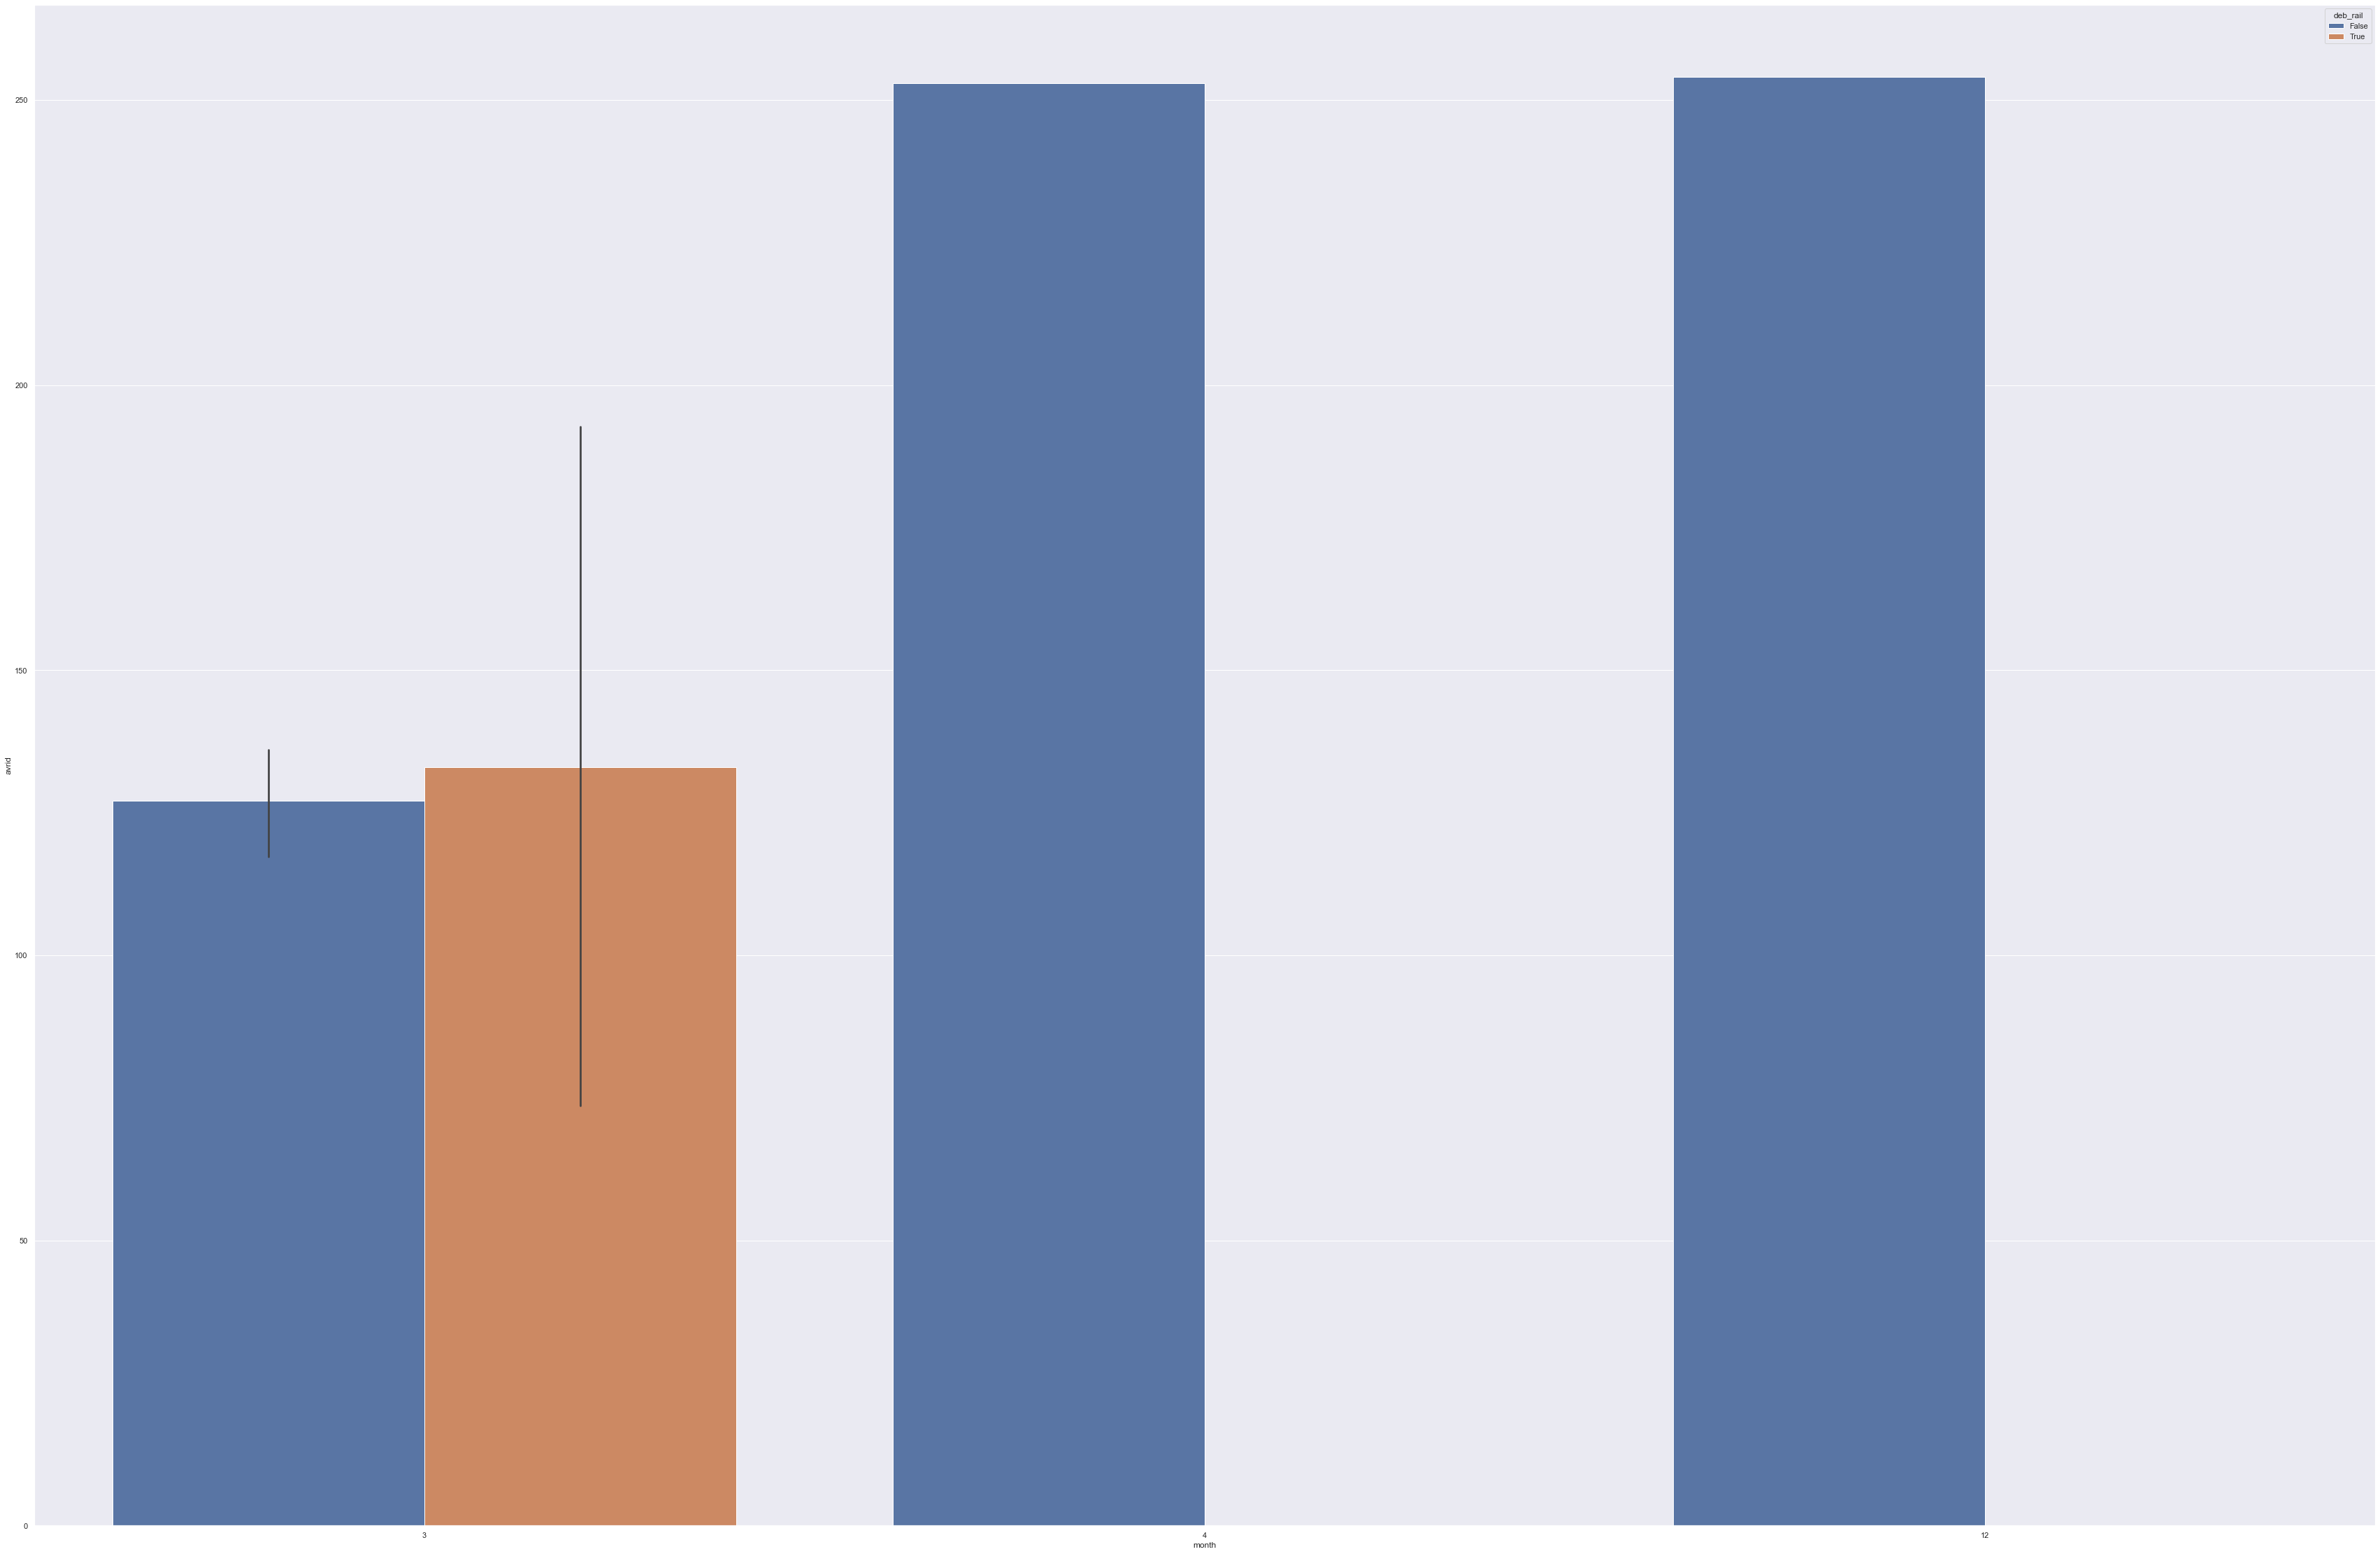

In [31]:
sns.set(rc={'figure.figsize':(60,40)})
sns.barplot(data=narrow16, x="month", y=narrow16.index, hue = 'deb_rail')